In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import boxcox

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.inspection import PartialDependenceDisplay


In [2]:
Train_df = pd.read_csv("Non_Urban_train_df.csv")

In [3]:
Train_df.head()

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,clusters,Revenue
0,Rural,Japanese,49,3259,34243,6,109,4.2,5.5,Yes,24,11,810.583476,High,nonurban,794650.87
1,Suburban,Indian,55,2662,34744,4,826,1.8,4.6,Yes,27,24,500.508350,Medium,nonurban,421854.52
2,Suburban,Italian,60,1515,19829,13,207,8.5,3.5,Yes,44,51,699.115449,Medium,nonurban,659678.50
3,Rural,Italian,35,1778,24218,1,234,5.6,5.8,No,0,7,576.446525,Medium,nonurban,358587.50
4,Rural,Japanese,30,2966,32413,2,792,6.8,6.5,No,19,23,1075.677952,High,nonurban,478350.21


In [4]:
Test_x = pd.read_csv("X_test.csv")
Test_x.head()

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category
0,Downtown,Japanese,86,9065,96518,18,696,9.8,5.7,Yes,8,72,916.451777,High
1,Suburban,Mexican,64,2695,33408,13,200,1.3,2.8,No,15,47,246.711479,Low
2,Rural,American,33,2040,28686,13,281,9.9,9.0,Yes,10,26,1040.465868,Medium
3,Rural,American,49,2137,23569,18,376,6.0,1.5,No,20,38,659.340288,Medium
4,Suburban,Italian,51,1304,15045,11,280,1.2,3.0,No,10,13,591.269321,Medium


In [5]:
Test_y = pd.read_csv("y_test.csv")
Test_y.head()

,Revenue
0,1281406.16
1,433648.30
2,311126.45
3,508506.91
4,583019.21


In [6]:
Test_x['clusters'] = Test_x['Location'].apply(lambda x: 'nonurban' if x in ['Suburban', 'Rural'] else 'urban')


In [7]:
Test_x

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,clusters
0,Downtown,Japanese,86,9065,96518,18,696,9.8,5.7,Yes,8,72,916.451777,High,urban
1,Suburban,Mexican,64,2695,33408,13,200,1.3,2.8,No,15,47,246.711479,Low,nonurban
2,Rural,American,33,2040,28686,13,281,9.9,9.0,Yes,10,26,1040.465868,Medium,nonurban
3,Rural,American,49,2137,23569,18,376,6.0,1.5,No,20,38,659.340288,Medium,nonurban
4,Suburban,Italian,51,1304,15045,11,280,1.2,3.0,No,10,13,591.269321,Medium,nonurban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,Downtown,Indian,87,5057,51442,4,192,1.7,2.1,Yes,70,86,351.636262,Medium,urban
2507,Suburban,French,63,1696,25010,10,389,5.6,2.3,Yes,40,40,454.949648,High,nonurban
2508,Downtown,Italian,80,3388,41761,10,234,1.2,8.6,Yes,44,15,794.682576,Medium,urban
2509,Suburban,Indian,67,4040,49738,12,745,8.6,2.5,No,34,47,468.604272,Medium,nonurban


In [8]:
Test_x['Revenue'] = Test_y['Revenue'].values

In [9]:
Test_x

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,clusters,Revenue
0,Downtown,Japanese,86,9065,96518,18,696,9.8,5.7,Yes,8,72,916.451777,High,urban,1281406.16
1,Suburban,Mexican,64,2695,33408,13,200,1.3,2.8,No,15,47,246.711479,Low,nonurban,433648.30
2,Rural,American,33,2040,28686,13,281,9.9,9.0,Yes,10,26,1040.465868,Medium,nonurban,311126.45
3,Rural,American,49,2137,23569,18,376,6.0,1.5,No,20,38,659.340288,Medium,nonurban,508506.91
4,Suburban,Italian,51,1304,15045,11,280,1.2,3.0,No,10,13,591.269321,Medium,nonurban,583019.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,Downtown,Indian,87,5057,51442,4,192,1.7,2.1,Yes,70,86,351.636262,Medium,urban,706428.88
2507,Suburban,French,63,1696,25010,10,389,5.6,2.3,Yes,40,40,454.949648,High,nonurban,890275.64
2508,Downtown,Italian,80,3388,41761,10,234,1.2,8.6,Yes,44,15,794.682576,Medium,urban,853145.80
2509,Suburban,Indian,67,4040,49738,12,745,8.6,2.5,No,34,47,468.604272,Medium,nonurban,475960.96


In [10]:
# Split into two DataFrames based on cluster column

cluster_nonurban_test_df= Test_x[Test_x['clusters'] == 'nonurban'].copy()
cluster_urban_test_df = Test_x[Test_x['clusters'] == 'urban'].copy()


In [11]:
cluster_nonurban_test_df

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,clusters,Revenue
1,Suburban,Mexican,64,2695,33408,13,200,1.3,2.8,No,15,47,246.711479,Low,nonurban,433648.30
2,Rural,American,33,2040,28686,13,281,9.9,9.0,Yes,10,26,1040.465868,Medium,nonurban,311126.45
3,Rural,American,49,2137,23569,18,376,6.0,1.5,No,20,38,659.340288,Medium,nonurban,508506.91
4,Suburban,Italian,51,1304,15045,11,280,1.2,3.0,No,10,13,591.269321,Medium,nonurban,583019.21
5,Rural,French,32,1875,18377,14,272,1.3,8.9,No,4,14,800.546744,High,nonurban,456809.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,Suburban,Italian,58,1864,25326,14,331,1.9,1.3,No,28,37,235.071878,Medium,nonurban,668377.22
2504,Suburban,Mexican,65,3242,33086,7,983,5.9,2.8,Yes,64,25,531.950341,Medium,nonurban,509857.34
2505,Rural,French,42,2637,32438,19,770,5.5,9.0,Yes,30,11,1069.429931,High,nonurban,631685.04
2507,Suburban,French,63,1696,25010,10,389,5.6,2.3,Yes,40,40,454.949648,High,nonurban,890275.64


In [12]:
cluster_urban_test_df

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,clusters,Revenue
0,Downtown,Japanese,86,9065,96518,18,696,9.8,5.7,Yes,8,72,916.451777,High,urban,1281406.16
9,Downtown,Mexican,89,1414,20379,4,714,7.7,6.1,No,45,0,269.778574,Medium,urban,689655.31
10,Downtown,French,77,2487,30116,9,118,9.2,4.3,No,6,6,341.468235,High,urban,1047222.30
15,Downtown,Japanese,85,3459,42040,13,220,4.4,8.4,Yes,52,67,564.044357,High,urban,1431431.14
17,Downtown,Japanese,74,5519,63074,3,628,1.8,9.3,Yes,25,52,1113.637721,High,urban,1224389.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,Downtown,Japanese,87,6097,66812,15,586,2.3,2.8,Yes,72,39,1190.511573,High,urban,1358123.46
2502,Downtown,French,72,5246,59451,15,566,5.4,5.1,Yes,27,29,646.473414,Medium,urban,946059.55
2506,Downtown,Indian,87,5057,51442,4,192,1.7,2.1,Yes,70,86,351.636262,Medium,urban,706428.88
2508,Downtown,Italian,80,3388,41761,10,234,1.2,8.6,Yes,44,15,794.682576,Medium,urban,853145.80


In [13]:
## Saving test set clusters into CSV

cluster_nonurban_test_df.to_csv('Non_Urban_test_df.csv', index=False)
cluster_urban_test_df.to_csv('Urban_test_df.csv', index=False)

In [14]:
Test_set = pd.read_csv("Non_Urban_test_df.csv")
Test_set.head()

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,clusters,Revenue
0,Suburban,Mexican,64,2695,33408,13,200,1.3,2.8,No,15,47,246.711479,Low,nonurban,433648.30
1,Rural,American,33,2040,28686,13,281,9.9,9.0,Yes,10,26,1040.465868,Medium,nonurban,311126.45
2,Rural,American,49,2137,23569,18,376,6.0,1.5,No,20,38,659.340288,Medium,nonurban,508506.91
3,Suburban,Italian,51,1304,15045,11,280,1.2,3.0,No,10,13,591.269321,Medium,nonurban,583019.21
4,Rural,French,32,1875,18377,14,272,1.3,8.9,No,4,14,800.546744,High,nonurban,456809.29


In [15]:
Test_x = Test_set.drop('Revenue',axis=1)
Test_y = Test_set['Revenue']

## Descriptive_Analisis

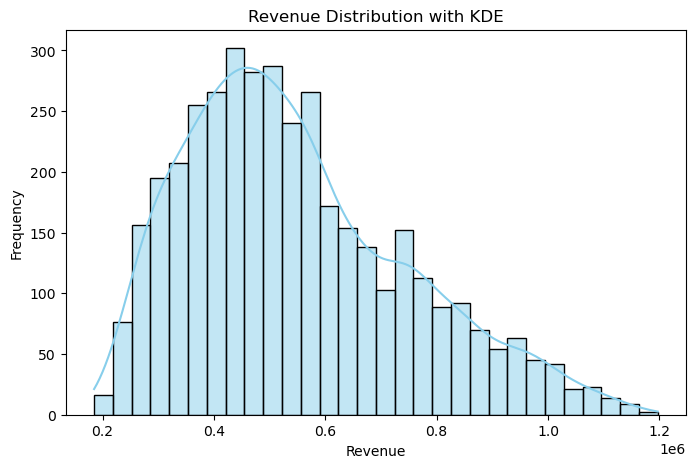

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(data=Train_df, x='Revenue', kde=True, bins=30, color='skyblue')

plt.title('Revenue Distribution with KDE')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

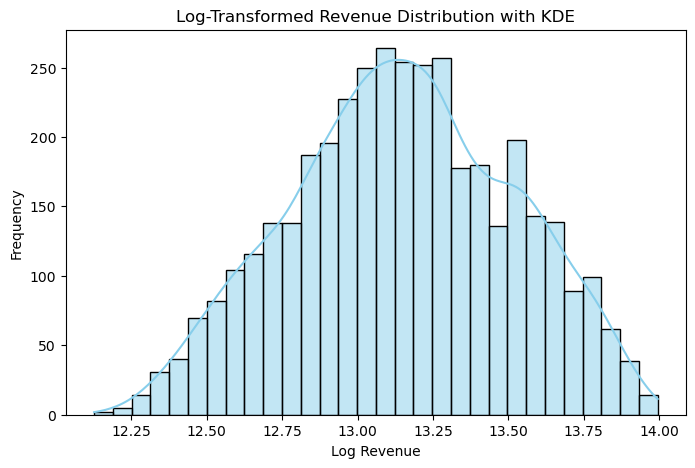

In [18]:
# Apply log transformation
Train_df['Log_Revenue'] = np.log1p(Train_df['Revenue'])  # log1p handles zero values safely

# Plot histogram with KDE
plt.figure(figsize=(8, 5))
sns.histplot(data=Train_df, x='Log_Revenue', kde=True, bins=30, color='skyblue')

plt.title('Log-Transformed Revenue Distribution with KDE')
plt.xlabel('Log Revenue')
plt.ylabel('Frequency')
plt.show()

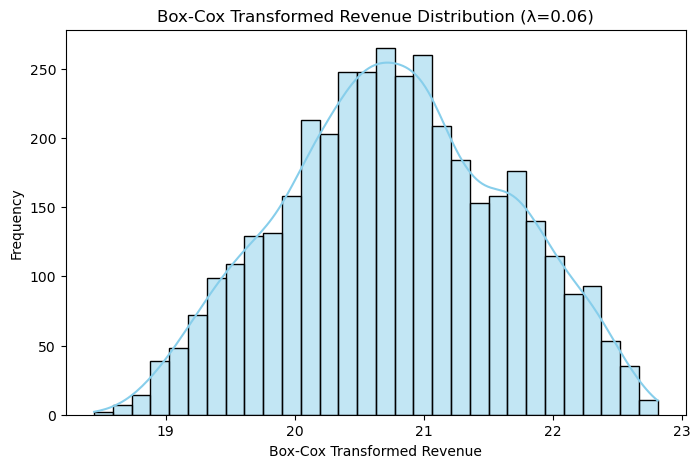

Optimal Lambda for Box-Cox Transformation: 0.06


In [19]:
# Apply Box-Cox transformation (requires positive values)
Train_df['BoxCox_Revenue'], lambda_value = boxcox(Train_df['Revenue'] + 1)  # Adding 1 to handle zero values

# Plot histogram with KDE
plt.figure(figsize=(8, 5))
sns.histplot(data=Train_df, x='BoxCox_Revenue', kde=True, bins=30, color='skyblue')

plt.title(f'Box-Cox Transformed Revenue Distribution (λ={lambda_value:.2f})')
plt.xlabel('Box-Cox Transformed Revenue')
plt.ylabel('Frequency')
plt.show()

# Print the lambda value
print(f"Optimal Lambda for Box-Cox Transformation: {lambda_value:.2f}")

In [20]:
Train_df

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,clusters,Revenue,Log_Revenue,BoxCox_Revenue
0,Rural,Japanese,49,3259,34243,6,109,4.2,5.5,Yes,24,11,810.583476,High,nonurban,794650.87,13.585659,21.807984
1,Suburban,Indian,55,2662,34744,4,826,1.8,4.6,Yes,27,24,500.508350,Medium,nonurban,421854.52,12.952418,20.309122
2,Suburban,Italian,60,1515,19829,13,207,8.5,3.5,Yes,44,51,699.115449,Medium,nonurban,659678.50,13.399509,21.360960
3,Rural,Italian,35,1778,24218,1,234,5.6,5.8,No,0,7,576.446525,Medium,nonurban,358587.50,12.789931,19.934353
4,Rural,Japanese,30,2966,32413,2,792,6.8,6.5,No,19,23,1075.677952,High,nonurban,478350.21,13.078100,20.601727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,Rural,Japanese,38,1925,19376,1,594,3.6,6.0,Yes,16,32,420.636825,High,nonurban,615576.80,13.330317,21.196171
3900,Suburban,French,68,2846,33561,19,278,5.9,1.1,No,60,0,879.088122,Medium,nonurban,926123.05,13.738763,22.179722
3901,Suburban,Italian,70,2521,26638,8,149,5.8,2.6,No,30,65,255.660252,Medium,nonurban,741198.15,13.516025,21.640129
3902,Rural,Italian,39,1198,15383,13,106,3.9,9.6,No,21,12,930.064661,Medium,nonurban,451999.81,13.021439,20.469517


In [21]:
Train_df_x = Train_df.drop(['Revenue', 'Log_Revenue', 'BoxCox_Revenue'], axis=1)
Train_df_x

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,clusters
0,Rural,Japanese,49,3259,34243,6,109,4.2,5.5,Yes,24,11,810.583476,High,nonurban
1,Suburban,Indian,55,2662,34744,4,826,1.8,4.6,Yes,27,24,500.508350,Medium,nonurban
2,Suburban,Italian,60,1515,19829,13,207,8.5,3.5,Yes,44,51,699.115449,Medium,nonurban
3,Rural,Italian,35,1778,24218,1,234,5.6,5.8,No,0,7,576.446525,Medium,nonurban
4,Rural,Japanese,30,2966,32413,2,792,6.8,6.5,No,19,23,1075.677952,High,nonurban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,Rural,Japanese,38,1925,19376,1,594,3.6,6.0,Yes,16,32,420.636825,High,nonurban
3900,Suburban,French,68,2846,33561,19,278,5.9,1.1,No,60,0,879.088122,Medium,nonurban
3901,Suburban,Italian,70,2521,26638,8,149,5.8,2.6,No,30,65,255.660252,Medium,nonurban
3902,Rural,Italian,39,1198,15383,13,106,3.9,9.6,No,21,12,930.064661,Medium,nonurban


In [22]:
Train_df_y = Train_df['Log_Revenue']
Train_df_y

0       13.585659
1       12.952418
2       13.399509
3       12.789931
4       13.078100
          ...    
3899    13.330317
3900    13.738763
3901    13.516025
3902    13.021439
3903    12.338692
Name: Log_Revenue, Length: 3904, dtype: float64

In [23]:
Test_y = np.log1p(Test_set['Revenue'])
Test_y

0       12.979991
1       12.647958
2       13.139236
3       13.275977
4       13.032023
          ...    
1638    13.412609
1639    13.141888
1640    13.356148
1641    13.699288
1642    13.073093
Name: Revenue, Length: 1643, dtype: float64

## Advance Analysis

### Encode, Transform

In [26]:
## Train set
location_encoder = OrdinalEncoder(categories=[['Rural', 'Suburban', 'Downtown']])
Train_df_x[['Location']] = location_encoder.fit_transform(Train_df_x[['Location']])
Train_df_x['Location'] = Train_df_x['Location'].astype(int)

price_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
Train_df_x[['Meal Price Category']] = price_encoder.fit_transform(Train_df_x[['Meal Price Category']])
Train_df_x['Meal Price Category'] = Train_df_x['Meal Price Category'].astype(int)

## Test set (Use same encoders)
Test_x[['Location']] = location_encoder.transform(Test_x[['Location']])
Test_x['Location'] = Test_x['Location'].astype(int)

Test_x[['Meal Price Category']] = price_encoder.transform(Test_x[['Meal Price Category']])
Test_x['Meal Price Category'] = Test_x['Meal Price Category'].astype(int)


In [27]:
Train_df_x

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,clusters
0,0,Japanese,49,3259,34243,6,109,4.2,5.5,Yes,24,11,810.583476,2,nonurban
1,1,Indian,55,2662,34744,4,826,1.8,4.6,Yes,27,24,500.508350,1,nonurban
2,1,Italian,60,1515,19829,13,207,8.5,3.5,Yes,44,51,699.115449,1,nonurban
3,0,Italian,35,1778,24218,1,234,5.6,5.8,No,0,7,576.446525,1,nonurban
4,0,Japanese,30,2966,32413,2,792,6.8,6.5,No,19,23,1075.677952,2,nonurban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,0,Japanese,38,1925,19376,1,594,3.6,6.0,Yes,16,32,420.636825,2,nonurban
3900,1,French,68,2846,33561,19,278,5.9,1.1,No,60,0,879.088122,1,nonurban
3901,1,Italian,70,2521,26638,8,149,5.8,2.6,No,30,65,255.660252,1,nonurban
3902,0,Italian,39,1198,15383,13,106,3.9,9.6,No,21,12,930.064661,1,nonurban


In [28]:
Test_x

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,clusters
0,1,Mexican,64,2695,33408,13,200,1.3,2.8,No,15,47,246.711479,0,nonurban
1,0,American,33,2040,28686,13,281,9.9,9.0,Yes,10,26,1040.465868,1,nonurban
2,0,American,49,2137,23569,18,376,6.0,1.5,No,20,38,659.340288,1,nonurban
3,1,Italian,51,1304,15045,11,280,1.2,3.0,No,10,13,591.269321,1,nonurban
4,0,French,32,1875,18377,14,272,1.3,8.9,No,4,14,800.546744,2,nonurban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1,Italian,58,1864,25326,14,331,1.9,1.3,No,28,37,235.071878,1,nonurban
1639,1,Mexican,65,3242,33086,7,983,5.9,2.8,Yes,64,25,531.950341,1,nonurban
1640,0,French,42,2637,32438,19,770,5.5,9.0,Yes,30,11,1069.429931,2,nonurban
1641,1,French,63,1696,25010,10,389,5.6,2.3,Yes,40,40,454.949648,2,nonurban


In [29]:
## Drop cluster column

Train_df_x.drop(columns=["clusters"], inplace=True)
Test_x.drop(columns=["clusters"], inplace=True)

In [30]:
categorical_cols = ['Cuisine', 'Parking Availability'] 
ordinal_categorical = ['Location', 'Meal Price Category','Cuisine', 'Parking Availability']
numerical_cols = [col for col in Train_df_x.columns if col not in ordinal_categorical]
numerical_cols = [col for col in Test_x.columns if col not in ordinal_categorical]

In [31]:
# Initialize encoder 
encoder = OneHotEncoder(drop=None, sparse_output=False)

# Fit and transform
encoded_cats = encoder.fit_transform(Train_df_x[categorical_cols])
encoded_cats_test = encoder.transform(Test_x[categorical_cols])  # Use transform() for test set

# Convert to DataFrame correctly
encoded_df = pd.DataFrame(
    encoded_cats,
    columns=encoder.get_feature_names_out()
)

encoded_df_test = pd.DataFrame(
    encoded_cats_test,
    columns=encoder.get_feature_names_out()
)


In [32]:
# Scale numerical features (critical for distance calculations)

scaler = StandardScaler()
Train_df_x[numerical_cols] = scaler.fit_transform(Train_df_x[numerical_cols])
Test_x[numerical_cols] = scaler.transform(Test_x[numerical_cols])

In [33]:
# Combine categorical features with numerical features

Train_df_x1 = pd.concat([Train_df_x[numerical_cols].reset_index(drop=True),
    encoded_df], axis=1)

Test_df_x1 = pd.concat([Test_x[numerical_cols].reset_index(drop=True),
    encoded_df_test], axis=1)

In [34]:
## Add meal price category 

Train_df_x1['Meal Price Category'] = Train_df_x['Meal Price Category'].values
Test_df_x1['Meal Price Category'] = Test_x['Meal Price Category'].values

## Add meal price category 

Train_df_x1['Location'] = Train_df_x['Location'].values
Test_df_x1['Location'] = Test_x['Location'].values

In [35]:
Train_df_x1

,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Review Quality Score,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_No,Parking Availability_Yes,Meal Price Category,Location
0,-0.087778,0.846527,0.568814,-0.708240,-1.509895,-0.518412,0.007502,-0.038850,-0.855066,0.331384,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,0
1,0.430132,0.247265,0.616082,-1.069154,1.087152,-1.454888,-0.341146,0.150265,-0.027003,-0.669370,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1
2,0.861724,-0.904081,-0.791123,0.554962,-1.154929,1.159440,-0.767270,1.221918,1.692821,-0.028374,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
3,-1.296234,-0.640084,-0.377029,-1.610526,-1.057132,0.027866,0.123717,-1.551772,-1.109855,-0.424283,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
4,-1.727826,0.552417,0.396156,-1.430069,0.964001,0.496103,0.394888,-0.354042,-0.090700,1.186965,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,-1.037279,-0.492527,-0.833863,-1.610526,0.246824,-0.752531,0.201195,-0.543157,0.482575,-0.927152,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,0
3900,1.552271,0.431962,0.504468,1.637706,-0.897760,0.144925,-1.696997,2.230532,-1.555735,0.552479,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
3901,1.724907,0.105731,-0.148705,-0.347325,-1.365011,0.105905,-1.115918,0.339380,2.584581,-1.459607,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
3902,-0.950961,-1.222282,-1.210596,0.554962,-1.520762,-0.635471,1.595784,-0.227965,-0.791369,0.717004,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0


In [36]:
Test_df_x1

,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Review Quality Score,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_No,Parking Availability_Yes,Meal Price Category,Location
0,1.206997,0.280390,0.490033,0.554962,-1.180284,-1.649987,-1.038440,-0.606196,1.438032,-1.488488,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,1
1,-1.468871,-0.377092,0.044520,0.554962,-0.886894,1.705718,1.363352,-0.921388,0.100392,1.073319,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
2,-0.087778,-0.279724,-0.438261,1.457248,-0.542794,0.183945,-1.542042,-0.291004,0.864758,-0.156747,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
3,0.084859,-1.115880,-1.242486,0.194047,-0.890516,-1.689007,-0.960963,-0.921388,-0.727672,-0.376443,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
4,-1.555189,-0.542717,-0.928117,0.735419,-0.919493,-1.649987,1.324614,-1.299618,-0.663974,0.298991,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.689087,-0.553758,-0.272491,0.735419,-0.705789,-1.415868,-1.619519,0.213304,0.801060,-1.526055,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
1639,1.293316,0.829462,0.459653,-0.527782,1.655822,0.144925,-1.038440,2.482686,0.036694,-0.567893,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1
1640,-0.692006,0.222170,0.398515,1.637706,0.884314,-0.011154,1.363352,0.339380,-0.855066,1.166799,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0
1641,1.120679,-0.722395,-0.302305,0.013590,-0.495707,0.027866,-1.232133,0.969764,0.992152,-0.816409,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1


### Lasso Regression

In [38]:
# LASSO REGRESSION

param_grid_lasso = {
    'alpha': np.logspace(-4, 2, 50)
}

lasso_model_tuned = Lasso(max_iter=5000)
grid_search_lasso = GridSearchCV(lasso_model_tuned, param_grid_lasso, cv=10, scoring='neg_mean_squared_error')
grid_search_lasso.fit(Train_df_x1, Train_df_y)

best_params_lasso = grid_search_lasso.best_params_
best_score_lasso = grid_search_lasso.best_score_

print("Best parameters for Lasso Regression:", best_params_lasso)
print("Best score for Lasso Regression:", best_score_lasso)

Best parameters for Lasso Regression: {'alpha': 0.0001}
Best score for Lasso Regression: -0.004309626226881516


In [39]:
lasso_model_best = Lasso(**best_params_lasso,max_iter=5000)
lasso_model_best.fit(Train_df_x1, Train_df_y)

# Predictions on the training set
lasso_train_predictions = lasso_model_best.predict(Train_df_x1)

# Predictions on the test set
lasso_test_predictions = lasso_model_best.predict(Test_df_x1)

In [40]:
Test_set
# MSE for training and test sets
lasso_train_mse = mean_squared_error(Train_df_y, lasso_train_predictions)
lasso_test_mse = mean_squared_error(Test_y, lasso_test_predictions)

# RMSE for training and test sets
lasso_train_rmse = root_mean_squared_error(Train_df_y, lasso_train_predictions)
lasso_test_rmse = root_mean_squared_error(Test_y, lasso_test_predictions)

# MAE for training and test sets
lasso_train_mae = mean_absolute_error(Train_df_y, lasso_train_predictions)
lasso_test_mae = mean_absolute_error(Test_y, lasso_test_predictions)

# R² for training and test sets
lasso_train_r2 = r2_score(Train_df_y, lasso_train_predictions)
lasso_test_r2 = r2_score(Test_y, lasso_test_predictions)

# MSE Difference (Overfitting Indicator)
lasso_mse_difference = lasso_train_mse - lasso_test_mse

print("Lasso Regression Train MSE:", lasso_train_mse)
print("Lasso Regression Train RMSE:", lasso_train_rmse)
print("Lasso Regression Train MAE:", lasso_train_mae)
print("Lasso Regression Train R²:", lasso_train_r2)

print("Lasso Regression Test MSE:", lasso_test_mse)
print("Lasso Regression Test RMSE:", lasso_test_rmse)
print("Lasso Regression Test MAE:", lasso_test_mae)
print("Lasso Regression Test R²:", lasso_test_r2)
print("Lasso Regression Train-Test mse difference", lasso_mse_difference)

Lasso Regression Train MSE: 0.004272275945424577
Lasso Regression Train RMSE: 0.06536264946760173
Lasso Regression Train MAE: 0.05315961050615183
Lasso Regression Train R²: 0.968155188887742
Lasso Regression Test MSE: 0.004533307451710977
Lasso Regression Test RMSE: 0.06732984072245364
Lasso Regression Test MAE: 0.05509952851749168
Lasso Regression Test R²: 0.9646664527206842
Lasso Regression Train-Test mse difference -0.00026103150628640007


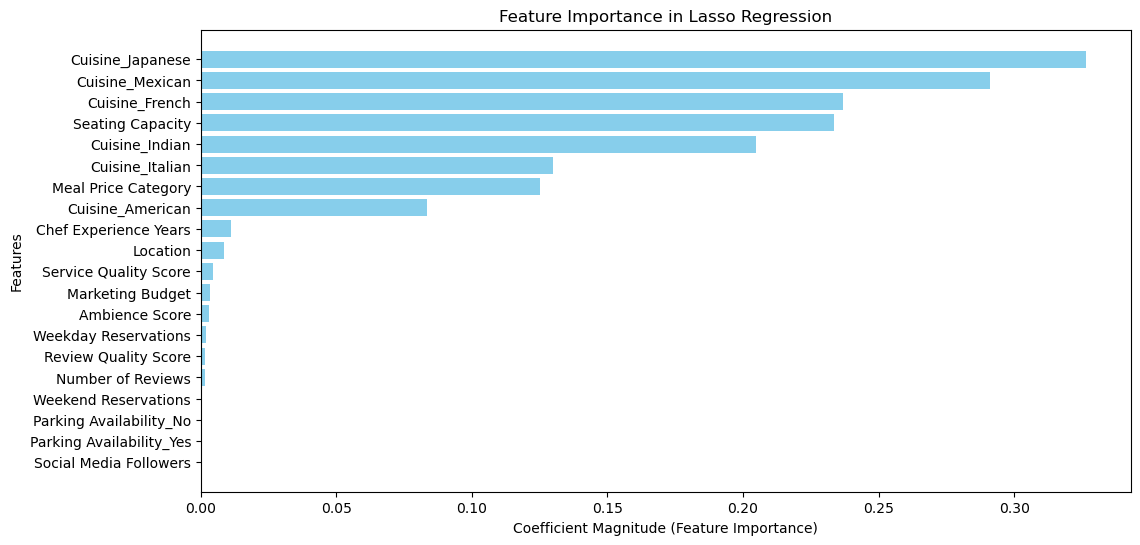

In [41]:
# Get feature names
features = Train_df_x1.columns

# Get absolute coefficients
lasso_coefficients = np.abs(lasso_model_best.coef_)

# Sort features by importance
sorted_indices = np.argsort(lasso_coefficients)[::-1]  # Sort in descending order

plt.figure(figsize=(12, 6))
plt.barh(np.array(features)[sorted_indices], lasso_coefficients[sorted_indices], color='skyblue')
plt.xlabel("Coefficient Magnitude (Feature Importance)")
plt.ylabel("Features")
plt.title("Feature Importance in Lasso Regression")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

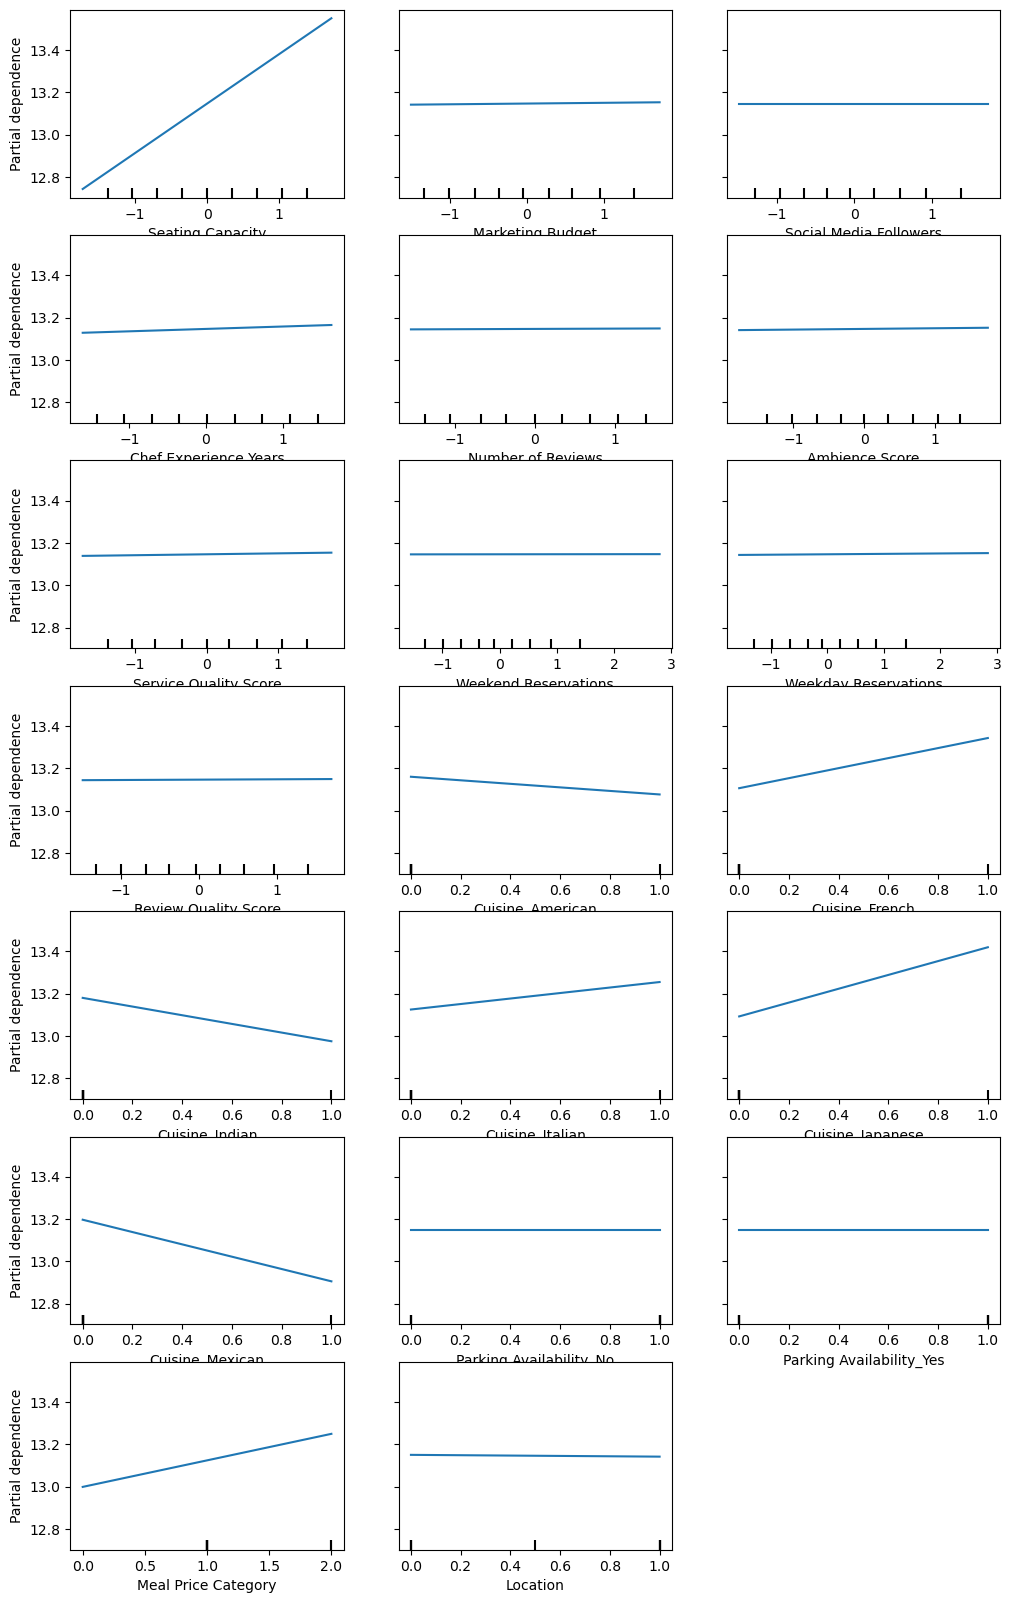

In [42]:
# Select features for PDP
features = Train_df_x1.columns  # All features

# Compute Partial Dependence
fig, ax = plt.subplots(figsize=(12, 20))
display = PartialDependenceDisplay.from_estimator(lasso_model_best, Train_df_x1, features, ax=ax)
plt.show()

In [43]:
# Get the coefficients (feature importance) from the trained Lasso model
lasso_coefficients = lasso_model_best.coef_

# Create a DataFrame to view the feature importance with their corresponding names
feature_importance = pd.DataFrame({
    'Feature': Train_df_x1.columns,
    'Coefficient': lasso_coefficients
})

# Sort the features based on the absolute value of the coefficients to get the most important ones
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance_sorted = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display the sorted feature importance
print("Feature Importance (sorted by absolute value of coefficients):")
print(feature_importance_sorted[['Feature', 'Coefficient']])


Feature Importance (sorted by absolute value of coefficients):
                     Feature  Coefficient
14          Cuisine_Japanese     0.326663
15           Cuisine_Mexican    -0.290916
11            Cuisine_French     0.236954
0           Seating Capacity     0.233547
12            Cuisine_Indian    -0.204794
13           Cuisine_Italian     0.129798
18       Meal Price Category     0.125291
10          Cuisine_American    -0.083587
3      Chef Experience Years     0.011308
19                  Location    -0.008422
6      Service Quality Score     0.004381
1           Marketing Budget     0.003494
5             Ambience Score     0.003161
8       Weekday Reservations     0.001964
9       Review Quality Score     0.001662
4          Number of Reviews     0.001401
7       Weekend Reservations     0.000245
16   Parking Availability_No    -0.000000
17  Parking Availability_Yes     0.000000
2     Social Media Followers    -0.000000


In [45]:
# List of 13 specific important features based on the given coefficients
selected_features_lasso = [
    'Cuisine_Japanese', 'Cuisine_French', 'Seating Capacity', 'Cuisine_Italian', 
    'Cuisine_Mexican', 'Meal Price Category', 'Cuisine_Indian', 'Chef Experience Years',

]

# Select the specific 13 features from your training and test data
Train_df_x1_selected = Train_df_x1[selected_features_lasso]
Test_df_x1_selected = Test_df_x1[selected_features_lasso]

# Perform Grid Search for best hyperparameters on the selected features
grid_search_lasso.fit(Train_df_x1_selected, Train_df_y)

# Get best parameters & score for Lasso
best_params_lasso = grid_search_lasso.best_params_
best_score_lasso = grid_search_lasso.best_score_

print("Best parameters for Lasso Regression (Selected 13 Features):", best_params_lasso)
print("Best score for Lasso Regression (Selected 13 Features):", best_score_lasso)

# Fit the Lasso model with the best parameters and the selected features
lasso_model_best = Lasso(**best_params_lasso, max_iter=5000)
lasso_model_best.fit(Train_df_x1_selected, Train_df_y)

# Predictions on the training set
lasso_train_predictions = lasso_model_best.predict(Train_df_x1_selected)

# Predictions on the test set
lasso_test_predictions = lasso_model_best.predict(Test_df_x1_selected)

# Compute Performance Metrics
lasso_train_mse = mean_squared_error(Train_df_y, lasso_train_predictions)
lasso_test_mse = mean_squared_error(Test_y, lasso_test_predictions)

lasso_train_rmse = np.sqrt(lasso_train_mse)
lasso_test_rmse = np.sqrt(lasso_test_mse)

lasso_train_mae = mean_absolute_error(Train_df_y, lasso_train_predictions)
lasso_test_mae = mean_absolute_error(Test_y, lasso_test_predictions)

lasso_train_r2 = r2_score(Train_df_y, lasso_train_predictions)
lasso_test_r2 = r2_score(Test_y, lasso_test_predictions)

# MSE Difference (Overfitting Indicator)
lasso_mse_difference = lasso_train_mse - lasso_test_mse

# Print results
print("Lasso Regression Train MSE:", lasso_train_mse)
print("Lasso Regression Train RMSE:", lasso_train_rmse)
print("Lasso Regression Train MAE:", lasso_train_mae)
print("Lasso Regression Train R²:", lasso_train_r2)

print("Lasso Regression Test MSE:", lasso_test_mse)
print("Lasso Regression Test RMSE:", lasso_test_rmse)
print("Lasso Regression Test MAE:", lasso_test_mae)
print("Lasso Regression Test R²:", lasso_test_r2)
print("Lasso Regression Train-Test mse difference", lasso_mse_difference)


Best parameters for Lasso Regression (Selected 13 Features): {'alpha': 0.0001}
Best score for Lasso Regression (Selected 13 Features): -0.0043531076224631125
Lasso Regression Train MSE: 0.004332301506459918
Lasso Regression Train RMSE: 0.06582022110613057
Lasso Regression Train MAE: 0.05352788483399819
Lasso Regression Train R²: 0.9677077686654773
Lasso Regression Test MSE: 0.004538336885279531
Lasso Regression Test RMSE: 0.06736717958531091
Lasso Regression Test MAE: 0.054946695351614894
Lasso Regression Test R²: 0.9646272522625914
Lasso Regression Train-Test mse difference -0.00020603537881961308


In [48]:
# Get the coefficients of the fitted Lasso model
lasso_coefficients = lasso_model_best.coef_

# Create a DataFrame to display features and their corresponding coefficients
feature_importance_df = pd.DataFrame({
    'Feature': selected_features_lasso,
    'Coefficient': lasso_coefficients
})

# Sort the features by absolute value of coefficients (important features will have higher absolute coefficients)
feature_importance_df['Absolute Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Print the feature importance values (sorted by absolute coefficient)
print("Feature Importance for Lasso Regression (Sorted by Absolute Coefficient):")
print(feature_importance_df[['Feature', 'Coefficient']])


Feature Importance for Lasso Regression (Sorted by Absolute Coefficient):
                 Feature  Coefficient
0       Cuisine_Japanese     0.411343
1         Cuisine_French     0.320938
2       Seating Capacity     0.230812
3        Cuisine_Italian     0.213965
4        Cuisine_Mexican    -0.207981
5    Meal Price Category     0.124514
6         Cuisine_Indian    -0.121051
7  Chef Experience Years     0.011277


### Elastic Net Regression

In [63]:
# Define parameter grid for Elastic Net (Grid Search)
param_grid_elasticnet = {
    'alpha': np.logspace(-4, 2, 50),  
    'l1_ratio': np.linspace(0.1, 0.9, 9)   # Ratio of L1 (Lasso) to L2 (Ridge) penalty
}

# Initialize Elastic Net model
elasticnet_model_tuned = ElasticNet()

# Perform Grid Search with cross-validation (cv=5)
grid_search_elasticnet = GridSearchCV(
    elasticnet_model_tuned, 
    param_grid_elasticnet, 
    cv=10, 
    scoring='neg_mean_squared_error'
)

# Fit Grid Search on training data
grid_search_elasticnet.fit(Train_df_x1, Train_df_y)

# Extract best parameters and best score
best_params_elasticnet = grid_search_elasticnet.best_params_
best_score_elasticnet = grid_search_elasticnet.best_score_

# Print best parameters and score
print("Best parameters for Elastic Net Regression:", best_params_elasticnet)
print("Best score for Elastic Net Regression:", best_score_elasticnet)

C:\Users\CHATHURANGI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.100e-02, tolerance: 4.677e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\CHATHURANGI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.440e-02, tolerance: 4.702e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\CHATHURANGI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

Best parameters for Elastic Net Regression: {'alpha': 0.00013257113655901095, 'l1_ratio': 0.9}
Best score for Elastic Net Regression: -0.004309661798231061


In [65]:
# Train the Best Elastic Net Model
# Initialize best Elastic Net model with optimal parameters
elasticnet_model_best = ElasticNet(**best_params_elasticnet)

# Train the model on scaled training data
elasticnet_model_best.fit(Train_df_x1, Train_df_y)

# Predictions and Error Metrics
# Predictions on the training set
elasticnet_train_predictions = elasticnet_model_best.predict(Train_df_x1)

# Predictions on the test set
elasticnet_test_predictions = elasticnet_model_best.predict(Test_df_x1)


In [66]:
# Compute Performance Metrics

# Mean Squared Error (MSE)
elasticnet_train_mse = mean_squared_error(Train_df_y, elasticnet_train_predictions)
elasticnet_test_mse = mean_squared_error(Test_y, elasticnet_test_predictions)

# Root Mean Squared Error (RMSE)
elasticnet_train_rmse = root_mean_squared_error(Train_df_y, elasticnet_train_predictions)
elasticnet_test_rmse = root_mean_squared_error(Test_y, elasticnet_test_predictions)

# Mean Absolute Error (MAE)
elasticnet_train_mae = mean_absolute_error(Train_df_y, elasticnet_train_predictions)
elasticnet_test_mae = mean_absolute_error(Test_y, elasticnet_test_predictions)

# R² Score (Coefficient of Determination)
elasticnet_train_r2 = r2_score(Train_df_y, elasticnet_train_predictions)
elasticnet_test_r2 = r2_score(Test_y, elasticnet_test_predictions)

# MSE Difference (Overfitting Indicator)
elasticnet_mse_difference = elasticnet_train_mse - elasticnet_test_mse


In [73]:
print("Elastic Net Regression Train MSE:", elasticnet_train_mse)
print("Elastic Net Regression Test MSE:", elasticnet_test_mse)
print("Elastic Net Regression Train RMSE:", elasticnet_train_rmse)
print("Elastic Net Regression Test RMSE:", elasticnet_test_rmse)
print("Elastic Net Regression Train MAE:", elasticnet_train_mae)
print("Elastic Net Regression Test MAE:", elasticnet_test_mae)
print("Elastic Net Regression Train R²:", elasticnet_train_r2)
print("Elastic Net Regression Test R²:", elasticnet_test_r2)
print("Elastic Net Train-Test MSE Difference:", elasticnet_mse_difference)

Elastic Net Regression Train MSE: 0.004272676634387402
Elastic Net Regression Test MSE: 0.004533620695981685
Elastic Net Regression Train RMSE: 0.0653657145175313
Elastic Net Regression Test RMSE: 0.06733216687424878
Elastic Net Regression Train MAE: 0.053166414018617936
Elastic Net Regression Test MAE: 0.05510332256422989
Elastic Net Regression Train R²: 0.9681522022210334
Elastic Net Regression Test R²: 0.9646640112292638
Elastic Net Train-Test MSE Difference: -0.00026094406159428256


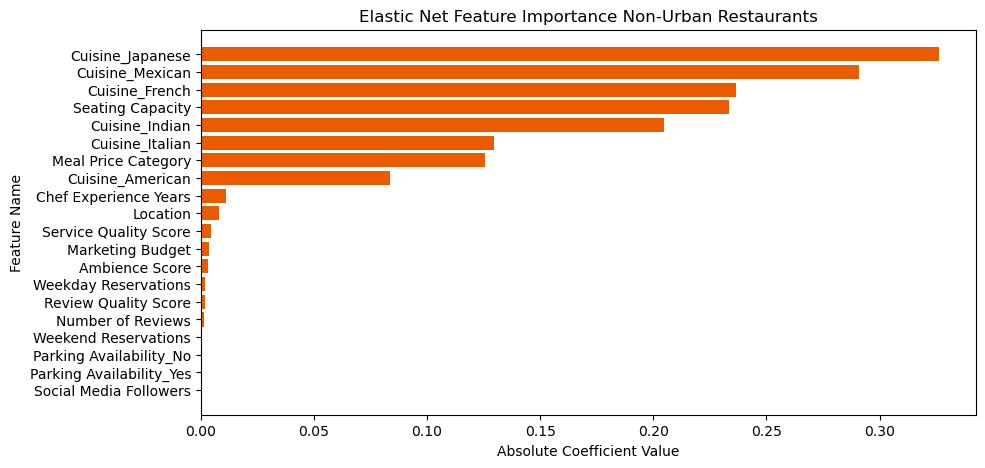

In [82]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

# Extract feature importance (absolute value of coefficients)
feature_importance = np.abs(elasticnet_model_best.coef_)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': Train_df_x1.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color="#EB5B00")
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Elastic Net Feature Importance Non-Urban Restaurants')
plt.gca().invert_yaxis()  # Invert y-axis to show top features first
plt.show()


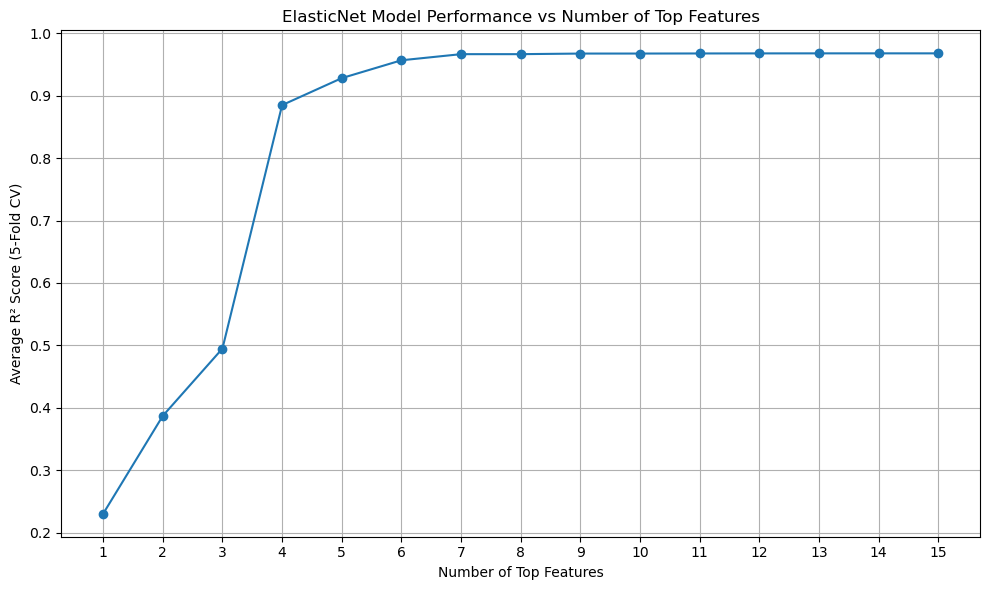

Top 1 features: Avg R² = 0.230
Top 2 features: Avg R² = 0.387
Top 3 features: Avg R² = 0.495
Top 4 features: Avg R² = 0.885
Top 5 features: Avg R² = 0.928
Top 6 features: Avg R² = 0.957
Top 7 features: Avg R² = 0.967
Top 8 features: Avg R² = 0.967
Top 9 features: Avg R² = 0.967
Top 10 features: Avg R² = 0.968
Top 11 features: Avg R² = 0.968
Top 12 features: Avg R² = 0.968
Top 13 features: Avg R² = 0.968
Top 14 features: Avg R² = 0.968
Top 15 features: Avg R² = 0.968


In [85]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Get and sort important features by absolute value of coefficients
important_features_df = pd.DataFrame({
    'feature': Train_df_x1.columns,
    'importance': np.abs(elasticnet_model_best.coef_)
}).sort_values(by='importance', ascending=False)

# Store results for plotting
feature_counts = []
r2_scores = []

# Test performance for different numbers of top features
for n in range(1, 16):
    top_features = important_features_df.head(n)['feature'].values.tolist()
    
    X_subset = Train_df_x1[top_features]
    y_target = Train_df_y

    scores = cross_val_score(
        ElasticNet(alpha=elasticnet_model_best.alpha, l1_ratio=elasticnet_model_best.l1_ratio),
        X_subset,
        y_target,
        cv=5,
        scoring='r2'
    )
    
    feature_counts.append(n)
    r2_scores.append(np.mean(scores))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, r2_scores, marker='o', linestyle='-')
plt.title("ElasticNet Model Performance vs Number of Top Features")
plt.xlabel("Number of Top Features")
plt.ylabel("Average R² Score (5-Fold CV)")
plt.grid(True)
plt.xticks(feature_counts)
plt.tight_layout()
plt.show()
for n in range(1, 16):
    top_features = important_features_df.head(n)['feature'].values.tolist()
    
    X_subset = Train_df_x1[top_features]  # Your feature matrix
    y_target = Train_df_y                 # Your log(revenue) target

    # Perform cross-validation
    scores = cross_val_score(ElasticNet(alpha=elasticnet_model_best.alpha, l1_ratio=elasticnet_model_best.l1_ratio),
                             X_subset, y_target, cv=5, scoring='r2')
    
    print(f"Top {n} features: Avg R² = {np.mean(scores):.3f}")
    

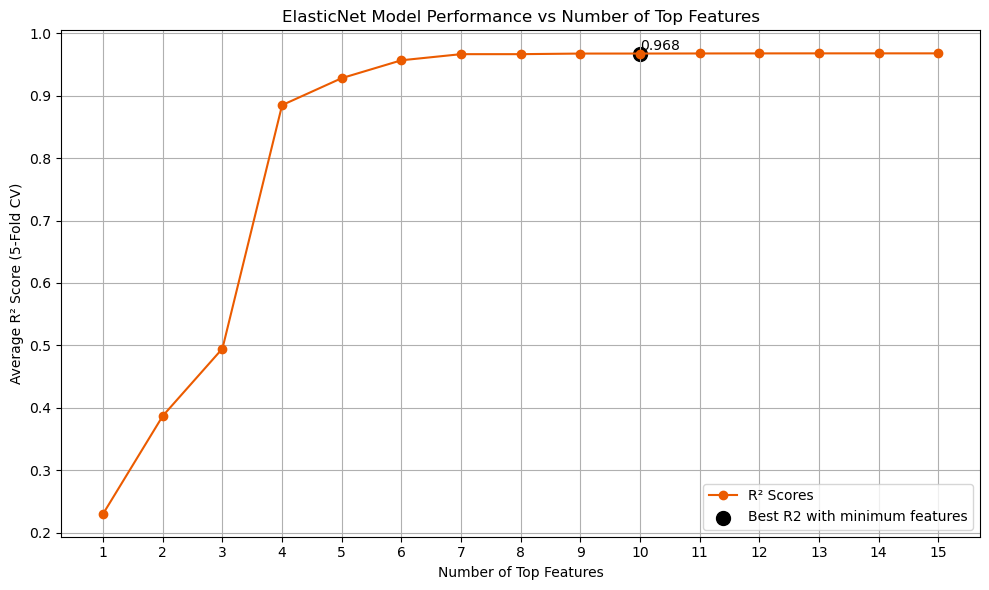

In [86]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, r2_scores, marker='o', linestyle='-', color='#EB5B00', label="R² Scores")

# Highlight the point for 10 features
if 10 in feature_counts:
    idx_10 = feature_counts.index(10)
    plt.scatter(10, r2_scores[idx_10], color='black', s=100, label='Best R2 with minimum features')

    # Optionally annotate the point with the R² value
    plt.annotate(f"{r2_scores[idx_10]:.3f}", (10, r2_scores[idx_10] + 0.005), color='black')

plt.title("ElasticNet Model Performance vs Number of Top Features")
plt.xlabel("Number of Top Features")
plt.ylabel("Average R² Score (5-Fold CV)")
plt.grid(True)
plt.xticks(feature_counts)
plt.legend()
plt.tight_layout()
plt.show()


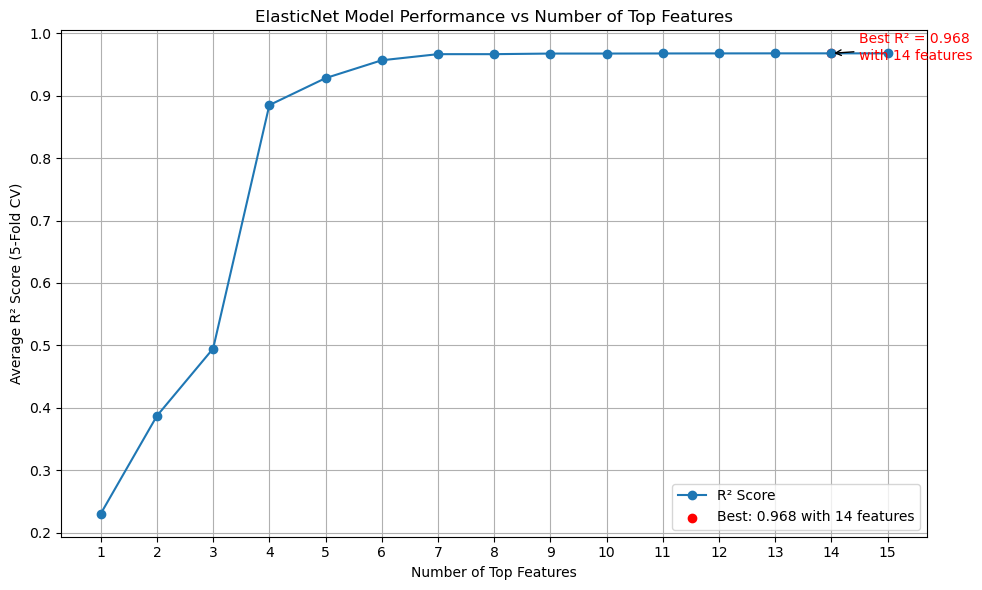

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
import pandas as pd

# Create sorted list of top features by absolute ElasticNet coefficient
important_features_df = pd.DataFrame({
    'feature': Train_df_x1.columns,
    'importance': np.abs(elasticnet_model_best.coef_)
}).sort_values(by='importance', ascending=False)

feature_counts = []
r2_scores = []

# Try top N features and store R² scores
for n in range(1, 16):
    top_features = important_features_df.head(n)['feature'].values.tolist()
    X_subset = Train_df_x1[top_features]
    y_target = Train_df_y

    scores = cross_val_score(
        ElasticNet(alpha=elasticnet_model_best.alpha, l1_ratio=elasticnet_model_best.l1_ratio),
        X_subset,
        y_target,
        cv=5,
        scoring='r2'
    )

    feature_counts.append(n)
    r2_scores.append(np.mean(scores))

# Convert to DataFrame for easy handling
results_df = pd.DataFrame({
    'num_features': feature_counts,
    'r2_score': r2_scores
})

# Find the best R² score (and the smallest number of features that achieved it)
best_r2 = results_df['r2_score'].max()
best_row = results_df[results_df['r2_score'] == best_r2].iloc[0]
best_n = best_row['num_features']

# Plot all
plt.figure(figsize=(10, 6))
plt.plot(results_df['num_features'], results_df['r2_score'], marker='o', label="R² Score")

# Highlight the best point
plt.scatter(best_n, best_r2, color='red', label=f'Best: {best_r2:.3f} with {int(best_n)} features')
plt.annotate(f'Best R² = {best_r2:.3f}\nwith {int(best_n)} features',
             xy=(best_n, best_r2),
             xytext=(best_n + 0.5, best_r2 - 0.01),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10,
             color='red')

# Labels
plt.title("ElasticNet Model Performance vs Number of Top Features")
plt.xlabel("Number of Top Features")
plt.ylabel("Average R² Score (5-Fold CV)")
plt.xticks(results_df['num_features'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


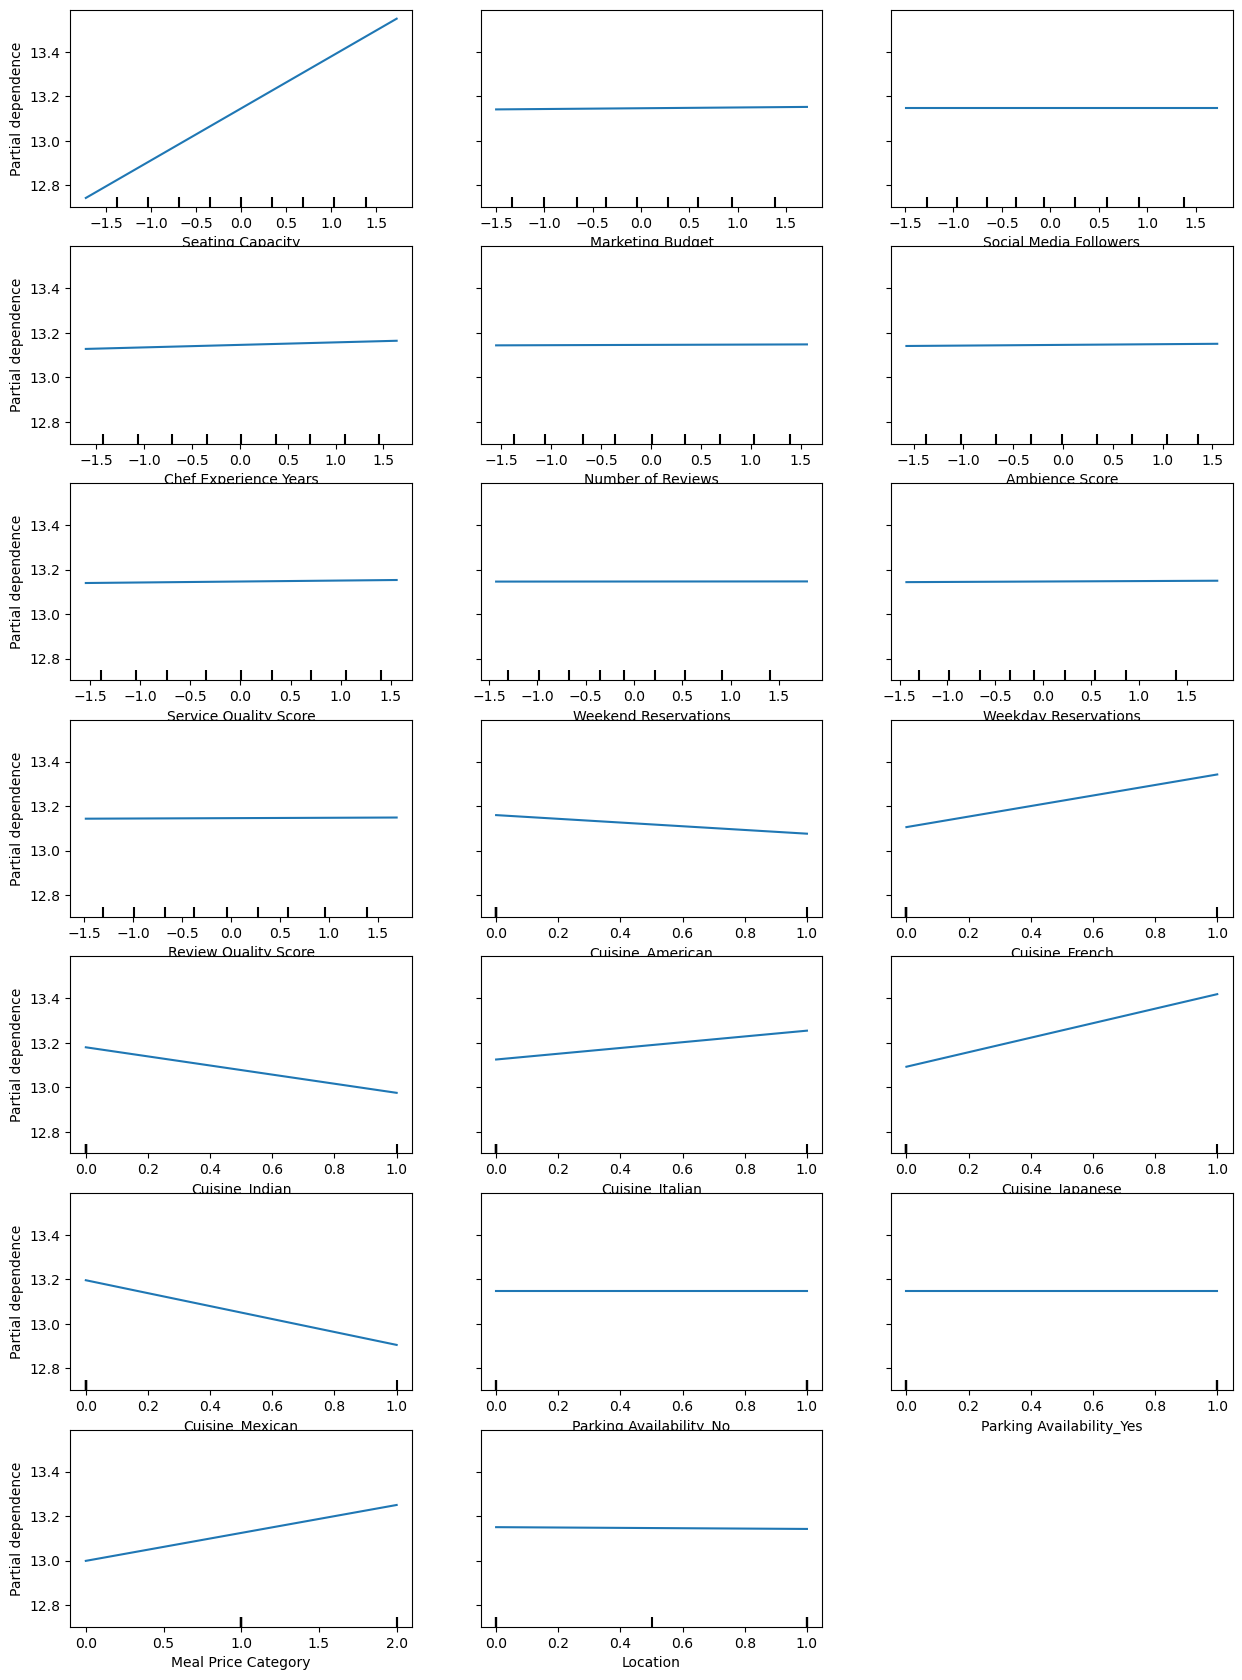

In [88]:
# Select all features for PDP
all_features_pdp = Train_df_x1.columns.tolist()

# Generate PDP plots for all features
fig, ax = plt.subplots(figsize=(15, 21))
display = PartialDependenceDisplay.from_estimator(
    elasticnet_model_best, Train_df_x1, features=all_features_pdp, ax=ax, grid_resolution=50
)
plt.show()


In [89]:
# Assuming 'elasticnet_model_best' is your fitted ElasticNet model
coefficients = elasticnet_model_best.coef_

# Create a DataFrame for better readability
feature_importance_en = pd.DataFrame({
    'Feature': Train_df_x1.columns,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients to get importance
feature_importance_en['Abs_Coefficient'] = feature_importance_en['Coefficient'].abs()
feature_importance_en = feature_importance_en.sort_values(by='Abs_Coefficient', ascending=False)

# Display feature importance
print(feature_importance_en[['Feature', 'Coefficient']])

                     Feature  Coefficient
14          Cuisine_Japanese     0.326191
15           Cuisine_Mexican    -0.290697
11            Cuisine_French     0.236631
0           Seating Capacity     0.233354
12            Cuisine_Indian    -0.204699
13           Cuisine_Italian     0.129635
18       Meal Price Category     0.125577
10          Cuisine_American    -0.083505
3      Chef Experience Years     0.011288
19                  Location    -0.008006
6      Service Quality Score     0.004364
1           Marketing Budget     0.003478
5             Ambience Score     0.003148
8       Weekday Reservations     0.001944
9       Review Quality Score     0.001648
4          Number of Reviews     0.001378
7       Weekend Reservations     0.000234
16   Parking Availability_No    -0.000000
17  Parking Availability_Yes     0.000000
2     Social Media Followers    -0.000000


In [90]:
# Remove the unimportant features from the dataset 
selected_features = ['Cuisine_Japanese', 'Cuisine_Mexican', 'Cuisine_French',  'Cuisine_Indian','Cuisine_Italian', 'Cuisine_American',
                      'Seating Capacity', 'Meal Price Category', 'Chef Experience Years', 'Location',
                     'Service Quality Score']

Train_df_x1_selected = Train_df_x1[selected_features]  # Subset of the training data with selected features
Test_df_x1_selected = Test_df_x1[selected_features]  # Subset of the test data with selected features

# Define parameter grid for Elastic Net (Grid Search)
param_grid_elasticnet = {
    'alpha': np.logspace(-4, 2, 50),  
    'l1_ratio': np.linspace(0.1, 0.9, 9)  # Ratio of L1 (Lasso) to L2 (Ridge) penalty
}

# Initialize Elastic Net model
elasticnet_model_tuned = ElasticNet()

# Perform Grid Search with cross-validation (cv=10)
grid_search_elasticnet = GridSearchCV(
    elasticnet_model_tuned, 
    param_grid_elasticnet, 
    cv=10, 
    scoring='neg_mean_squared_error'
)

# Fit Grid Search on training data
grid_search_elasticnet.fit(Train_df_x1_selected, Train_df_y)

# Extract best parameters and best score
best_params_elasticnet = grid_search_elasticnet.best_params_
best_score_elasticnet = grid_search_elasticnet.best_score_

# Print best parameters and score
print("Best parameters for Elastic Net Regression:", best_params_elasticnet)
print("Best score for Elastic Net Regression:", best_score_elasticnet)

# Train the Best Elastic Net Model
# Initialize best Elastic Net model with optimal parameters
elasticnet_model_best = ElasticNet(**best_params_elasticnet)

# Train the model on scaled training data
elasticnet_model_best.fit(Train_df_x1_selected, Train_df_y)

# Predictions and Error Metrics
# Predictions on the training set
elasticnet_train_predictions = elasticnet_model_best.predict(Train_df_x1_selected)

# Predictions on the test set
elasticnet_test_predictions = elasticnet_model_best.predict(Test_df_x1_selected)

# Compute Performance Metrics
# Mean Squared Error (MSE)
elasticnet_train_mse = mean_squared_error(Train_df_y, elasticnet_train_predictions)
elasticnet_test_mse = mean_squared_error(Test_y, elasticnet_test_predictions)

# Root Mean Squared Error (RMSE)
elasticnet_train_rmse = np.sqrt(elasticnet_train_mse)
elasticnet_test_rmse = np.sqrt(elasticnet_test_mse)

# Mean Absolute Error (MAE)
elasticnet_train_mae = mean_absolute_error(Train_df_y, elasticnet_train_predictions)
elasticnet_test_mae = mean_absolute_error(Test_y, elasticnet_test_predictions)

# R² Score (Coefficient of Determination)
elasticnet_train_r2 = r2_score(Train_df_y, elasticnet_train_predictions)
elasticnet_test_r2 = r2_score(Test_y, elasticnet_test_predictions)

# MSE Difference (Overfitting Indicator)
elasticnet_mse_difference = elasticnet_train_mse - elasticnet_test_mse

# Print performance metrics
print("Elastic Net Regression Train MSE:", elasticnet_train_mse)
print("Elastic Net Regression Test MSE:", elasticnet_test_mse)
print("Elastic Net Regression Train RMSE:", elasticnet_train_rmse)
print("Elastic Net Regression Test RMSE:", elasticnet_test_rmse)
print("Elastic Net Regression Train MAE:", elasticnet_train_mae)
print("Elastic Net Regression Test MAE:", elasticnet_test_mae)
print("Elastic Net Regression Train R²:", elasticnet_train_r2)
print("Elastic Net Regression Test R²:", elasticnet_test_r2)
print("Elastic Net Train-Test MSE Difference:", elasticnet_mse_difference)

C:\Users\CHATHURANGI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.556e-01, tolerance: 4.718e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\CHATHURANGI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.597e-01, tolerance: 4.677e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\CHATHURANGI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

Best parameters for Elastic Net Regression: {'alpha': 0.0001, 'l1_ratio': 0.1}
Best score for Elastic Net Regression: -0.004329657981357853
Elastic Net Regression Train MSE: 0.0043050832347613565
Elastic Net Regression Test MSE: 0.004531679162653565
Elastic Net Regression Train RMSE: 0.06561313309667019
Elastic Net Regression Test RMSE: 0.06731774775386923
Elastic Net Regression Train MAE: 0.05336773619386367
Elastic Net Regression Test MAE: 0.05494479379763524
Elastic Net Regression Train R²: 0.967910648987843
Elastic Net Regression Test R²: 0.964679143946463
Elastic Net Train-Test MSE Difference: -0.00022659592789220882


C:\Users\CHATHURANGI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.783e-01, tolerance: 5.238e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\CHATHURANGI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.783e-01, tolerance: 5.238e-02
  model = cd_fast.enet_coordinate_descent(


In [94]:
# After training the best Elastic Net model with selected features
# Get the coefficients for the reduced model
coefficients = elasticnet_model_best.coef_

# Create a DataFrame to display the features and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': selected_features,  # The selected features
    'Coefficient': coefficients  # The coefficients from the trained model
})

# Sort the coefficients by absolute value to see the most important features
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print the coefficients for the reduced model
print(coef_df)


                  Feature  Coefficient  Abs_Coefficient
0        Cuisine_Japanese     0.319638         0.319638
1         Cuisine_Mexican    -0.299986         0.299986
6        Seating Capacity     0.235285         0.235285
2          Cuisine_French     0.229373         0.229373
3          Cuisine_Indian    -0.213227         0.213227
7     Meal Price Category     0.124508         0.124508
4         Cuisine_Italian     0.122675         0.122675
5        Cuisine_American    -0.092133         0.092133
8   Chef Experience Years     0.011461         0.011461
9                Location    -0.010236         0.010236
10  Service Quality Score     0.004415         0.004415


In [96]:
numerical_cols2 = ['Seating Capacity', 'Chef Experience Years', 'Service Quality Score']

# Apply inverse transform to the full set of numerical columns
rescaled_all = scaler.inverse_transform(Train_df_x1[numerical_cols])  # original 10 cols

# Turn it back into a DataFrame
rescaled_all_df = pd.DataFrame(rescaled_all, columns=numerical_cols)

# Now select the 3 columns you want
rescaled_selected_df = rescaled_all_df[numerical_cols2]

In [97]:
Train_df_x1_new =Train_df_x1[selected_features].drop(columns=[col for col in numerical_cols2 if col in selected_features])
Train_df_x1_new['Seating Capacity'] = rescaled_selected_df['Seating Capacity']
Train_df_x1_new['Chef Experience Years'] = rescaled_selected_df['Chef Experience Years']
Train_df_x1_new['Service Quality Score'] = rescaled_selected_df['Service Quality Score']
Train_df_x1_new

,Cuisine_Japanese,Cuisine_Mexican,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_American,Meal Price Category,Location,Seating Capacity,Chef Experience Years,Service Quality Score
0,1.0,0.0,0.0,0.0,0.0,0.0,2,0,49.0,6.0,5.5
1,0.0,0.0,0.0,1.0,0.0,0.0,1,1,55.0,4.0,4.6
2,0.0,0.0,0.0,0.0,1.0,0.0,1,1,60.0,13.0,3.5
3,0.0,0.0,0.0,0.0,1.0,0.0,1,0,35.0,1.0,5.8
4,1.0,0.0,0.0,0.0,0.0,0.0,2,0,30.0,2.0,6.5
...,...,...,...,...,...,...,...,...,...,...,...
3899,1.0,0.0,0.0,0.0,0.0,0.0,2,0,38.0,1.0,6.0
3900,0.0,0.0,1.0,0.0,0.0,0.0,1,1,68.0,19.0,1.1
3901,0.0,0.0,0.0,0.0,1.0,0.0,1,1,70.0,8.0,2.6
3902,0.0,0.0,0.0,0.0,1.0,0.0,1,0,39.0,13.0,9.6


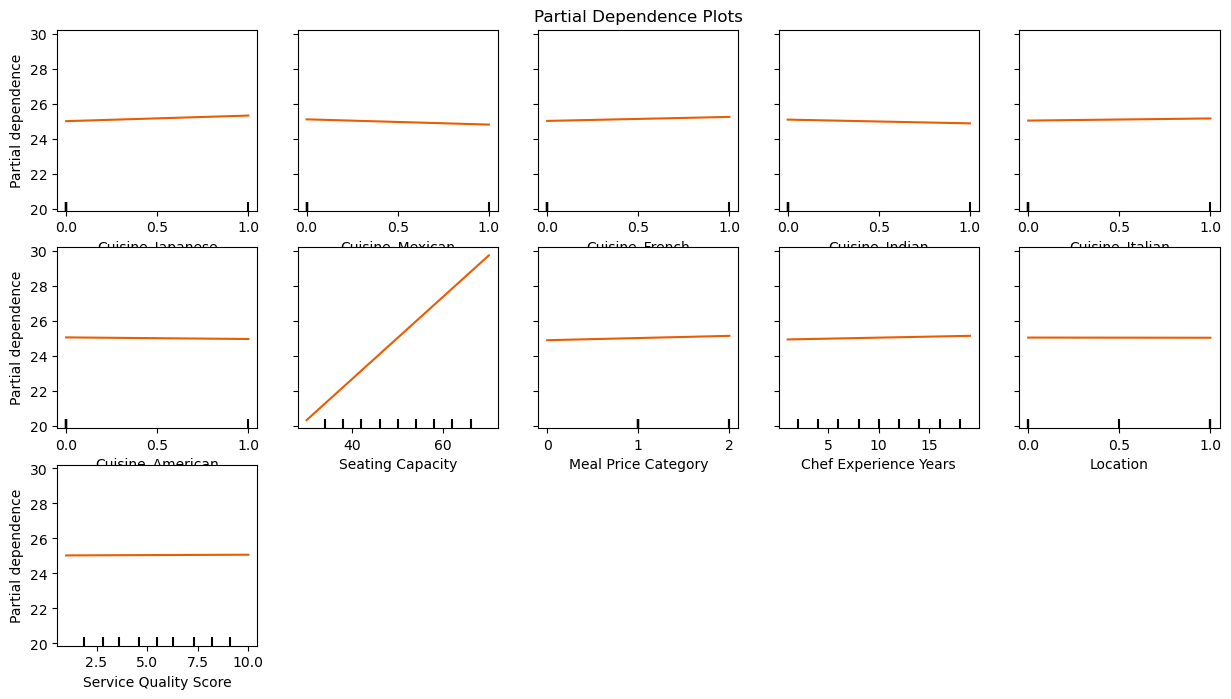

In [63]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=elasticnet_model_best,
    X=Train_df_x1_new[selected_features],  # Use column names here
    features=selected_features,  # Use column names
    random_state=5,
    n_cols=5,
    ax=ax,
    line_kw={"color": "#EB5B00"},
)
plt.savefig("partial_dependence_plots.png", dpi=300, bbox_inches="tight")
plt.show()


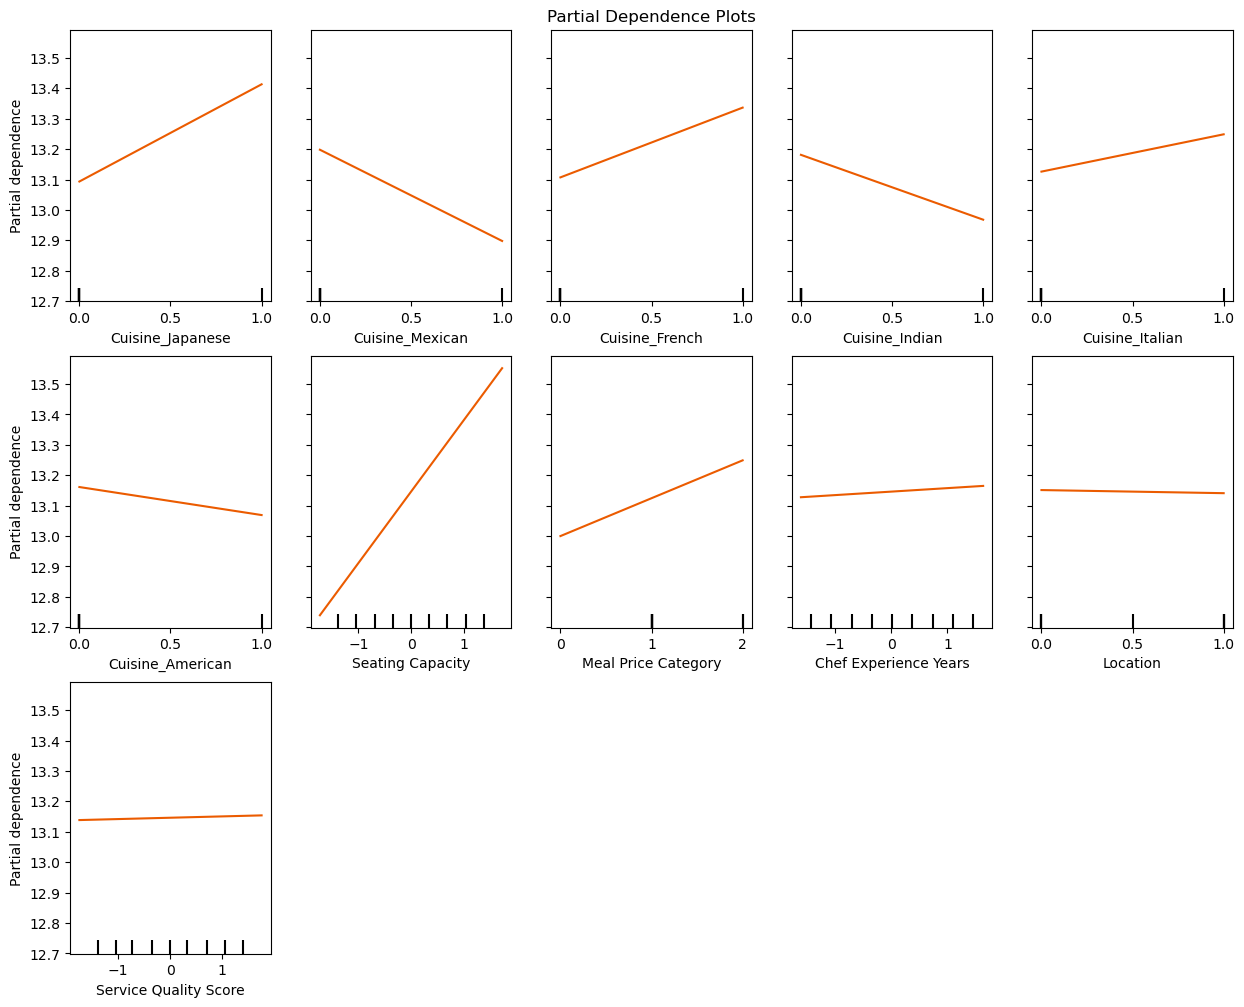

In [144]:
fig, ax = plt.subplots(figsize=(15, 12))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=elasticnet_model_best,                  # Your trained ElasticNet model
    X=Train_df_x1_selected,                 # Input features (not transformed back)
    features=selected_features,                       # All features to plot
    random_state=5,
    n_cols=5,                                         # Show 5 plots per row
    ax=ax,
    line_kw={"color": "#EB5B00"}                      # Line color (your brand orange)
)
plt.savefig("partial_dependence_plots.png", dpi=300, bbox_inches="tight")
plt.show()


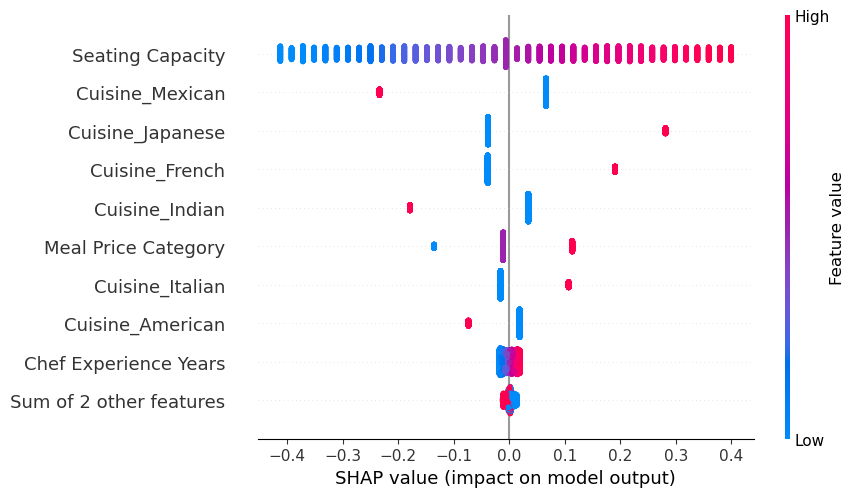

In [102]:
import shap
import matplotlib.pyplot as plt

# Create the SHAP explainer
explainer = shap.Explainer(elasticnet_model_best, Train_df_x1_selected)

# Calculate SHAP values
shap_values = explainer(Train_df_x1_selected)

# Show beeswarm plot
shap.plots.beeswarm(shap_values)

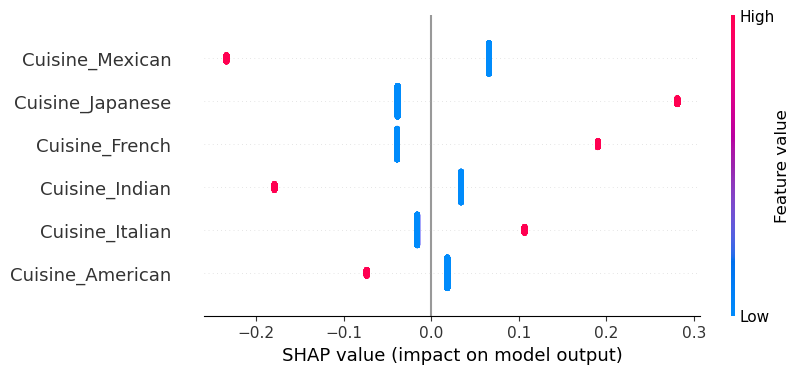

In [182]:
import shap
import matplotlib.pyplot as plt

# Create the SHAP explainer
explainer = shap.Explainer(elasticnet_model_best, Train_df_x1_selected)

# Calculate SHAP values
shap_values = explainer(Train_df_x1_selected)

# List of cuisine-related feature names (adjust based on your actual columns)
cuisine_features = [col for col in Train_df_x1_selected.columns 
                    if col.startswith('Cuisine_')]

# Filter SHAP values to include only cuisine features
shap_values_cuisine = shap_values[:, cuisine_features]

# Plot beeswarm for cuisine features only
shap.plots.beeswarm(shap_values_cuisine)


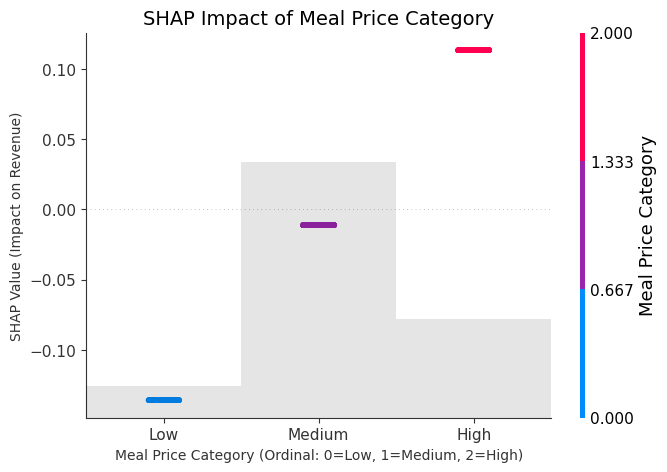

In [186]:
import shap
import matplotlib.pyplot as plt

# Generate SHAP values
explainer = shap.Explainer(elasticnet_model_best, Train_df_x1_selected)
shap_values = explainer(Train_df_x1_selected)

# Scatter plot for Meal Price Category (ordinal)
shap.plots.scatter(
    shap_values[:, "Meal Price Category"], 
    color=shap_values[:, "Meal Price Category"],  # Color by the same feature
    show=False
)

# Customize labels
plt.title("SHAP Impact of Meal Price Category", fontsize=14)
plt.xlabel("Meal Price Category (Ordinal: 0=Low, 1=Medium, 2=High)", fontsize=10)
plt.ylabel("SHAP Value (Impact on Revenue)", fontsize=10)
plt.xticks(ticks=[0, 1, 2], labels=["Low", "Medium", "High"])  # Map ordinal to labels
plt.show()

In [160]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the feature index
meal_price_index = selected_features.index("Meal Price Category")

# Extract SHAP values for that feature
shap_vals = shap_values[:, meal_price_index].values
price_labels = Train_df_x1_selected["Meal Price Category"].map({0: "Low", 1: "Medium", 2: "High"})

# Put into DataFrame
shap_df = pd.DataFrame({
    "Meal Price Category": price_labels,
    "SHAP": shap_vals
})

# Compute average SHAP for each category
mean_shap = shap_df.groupby("Meal Price Category")["SHAP"].mean().sort_values()
mean_shap

Meal Price Category
Low      -0.135713
Medium   -0.011206
High      0.113302
Name: SHAP, dtype: float64

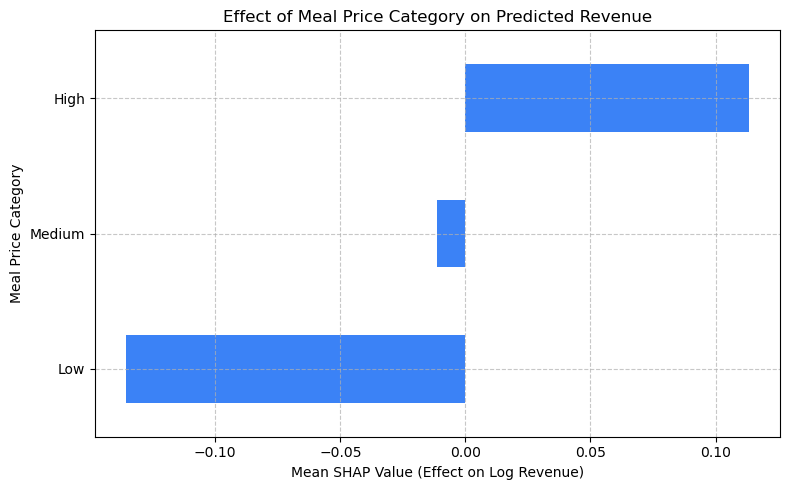

In [162]:
mean_shap.plot(kind='barh', color="#3b82f6", figsize=(8, 5))
plt.title("Effect of Meal Price Category on Predicted Revenue")
plt.xlabel("Mean SHAP Value (Effect on Log Revenue)")
plt.ylabel("Meal Price Category")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [65]:
# Step 1: Predict on the training data (in log scale)
log_preds = elasticnet_model_best.predict(Train_df_x1[selected_features])

# Step 2: Calculate residuals (actual log values - predicted)
residuals = Train_df_y - log_preds

# Step 3: Compute the smearing factor
smearing_factor = np.mean(np.expm1(residuals))
print("Smearing Factor:", smearing_factor)


Smearing Factor: 0.002149058190088644


### Ridge Regression

In [67]:
# Define hyperparameter grid
param_grid_ridge = {
    'alpha': np.logspace(-4, 2, 50)  # Regularization strength
}

# Perform Grid Search for best hyperparameters
ridge_model_tuned = Ridge()
grid_search_ridge = GridSearchCV(ridge_model_tuned, param_grid_ridge, cv=10, scoring='neg_mean_squared_error')
grid_search_ridge.fit(Train_df_x1, Train_df_y)

# Get best parameters & score
best_params_ridge = grid_search_ridge.best_params_
best_score_ridge = grid_search_ridge.best_score_

print("Best parameters for Ridge Regression:", best_params_ridge)
print("Best score for Ridge Regression:", best_score_ridge)

Best parameters for Ridge Regression: {'alpha': 0.0655128556859551}
Best score for Ridge Regression: -0.004310915530000146


In [68]:
# Fit model with best parameters
ridge_model_best = Ridge(**best_params_ridge)
ridge_model_best.fit(Train_df_x1, Train_df_y)

# Predictions on the training set
ridge_train_predictions = ridge_model_best.predict(Train_df_x1)

# Predictions on the test set
ridge_test_predictions = ridge_model_best.predict(Test_df_x1)

In [69]:
# Compute Performance Metrics
ridge_train_mse = mean_squared_error(Train_df_y, ridge_train_predictions)
ridge_test_mse = mean_squared_error(Test_y, ridge_test_predictions)

ridge_train_rmse = root_mean_squared_error(Train_df_y, ridge_train_predictions)
ridge_test_rmse = root_mean_squared_error(Test_y, ridge_test_predictions)

ridge_train_mae = mean_absolute_error(Train_df_y, ridge_train_predictions)
ridge_test_mae = mean_absolute_error(Test_y, ridge_test_predictions)

ridge_train_r2 = r2_score(Train_df_y, ridge_train_predictions)
ridge_test_r2 = r2_score(Test_y, ridge_test_predictions)

# MSE Difference (Overfitting Indicator)
ridge_mse_difference = ridge_train_mse - ridge_test_mse

# Print results
print("Ridge Regression Train MSE:", ridge_train_mse)
print("Ridge Regression Test MSE:", ridge_test_mse)
print("Ridge Regression Train RMSE:", ridge_train_rmse)
print("Ridge Regression Test RMSE:", ridge_test_rmse)
print("Ridge Regression Train MAE:", ridge_train_mae)
print("Ridge Regression Test MAE:", ridge_test_mae)
print("Ridge Regression Train R²:", ridge_train_r2)
print("Ridge Regression Test R²:", ridge_test_r2)
print("Ridge Train-Test MSE Difference:", ridge_mse_difference)

Ridge Regression Train MSE: 0.004271144208333874
Ridge Regression Test MSE: 0.004534276803527575
Ridge Regression Train RMSE: 0.06535399152564343
Ridge Regression Test RMSE: 0.06733703886812646
Ridge Regression Train MAE: 0.05313138266721448
Ridge Regression Test MAE: 0.05511474682197822
Ridge Regression Train R²: 0.9681636246616345
Ridge Regression Test R²: 0.9646588973897019
Ridge Train-Test MSE Difference: -0.00026313259519370087


### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

# Perform Grid Search for best hyperparameters
rf_model_tuned = RandomForestRegressor(random_state=1000)
grid_search_rf = GridSearchCV(rf_model_tuned, param_grid_rf, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(Train_df_x1, Train_df_y)

# Get best parameters & score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best parameters for Random Forest:", best_params_rf)
print("Best score for Random Forest:", best_score_rf)

# Fit model with best parameters
rf_model_best = RandomForestRegressor(**best_params_rf, random_state=42)
rf_model_best.fit(Train_df_x1, Train_df_y)

# Predictions on the training set
rf_train_predictions = rf_model_best.predict(Train_df_x1)

# Predictions on the test set
rf_test_predictions = rf_model_best.predict(Test_df_x1)

# Compute Performance Metrics
rf_train_mse = mean_squared_error(Train_df_y, rf_train_predictions)
rf_test_mse = mean_squared_error(Test_y, rf_test_predictions)

rf_train_rmse = np.sqrt(rf_train_mse)
rf_test_rmse = np.sqrt(rf_test_mse)

rf_train_mae = mean_absolute_error(Train_df_y, rf_train_predictions)
rf_test_mae = mean_absolute_error(Test_y, rf_test_predictions)

rf_train_r2 = r2_score(Train_df_y, rf_train_predictions)
rf_test_r2 = r2_score(Test_y, rf_test_predictions)

# MSE Difference (Overfitting Indicator)
rf_mse_difference = rf_train_mse - rf_test_mse

# Print results
print("Random Forest Train MSE:", rf_train_mse)
print("Random Forest Test MSE:", rf_test_mse)
print("Random Forest Train RMSE:", rf_train_rmse)
print("Random Forest Test RMSE:", rf_test_rmse)
print("Random Forest Train MAE:", rf_train_mae)
print("Random Forest Test MAE:", rf_test_mae)
print("Random Forest Train R²:", rf_train_r2)
print("Random Forest Test R²:", rf_test_r2)
print("Random Forest Train-Test MSE Difference:", rf_mse_difference)


In [ ]:
# Get feature importances
feature_importance = rf_model_best.feature_importances_

# Create a DataFrame for better visualization
feature_names = Train_df_x1.columns  # Column names of the dataset
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort by importance (descending)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_r')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Get all feature names from the dataset
features = Train_df_x1.columns.tolist()

# Create PDP for all features
fig, ax = plt.subplots(figsize=(12, 20))
PartialDependenceDisplay.from_estimator(rf_model_best, Train_df_x1, features, n_cols=3, ax=ax)

plt.suptitle('Partial Dependence Plots for All Features in Random Forest Model')
plt.show()

In [ ]:
importances = rf_model_best.feature_importances_

# Convert to DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': Train_df_x1.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display
print(feature_importance_df)

In [ ]:
# List of the top 10 most important features
top_features = [
    'Meal Price Category', 'Cuisine_Mexican', 'Cuisine_Indian', 'Seating Capacity',
    'Cuisine_Italian', 'Cuisine_French', 'Cuisine_Japanese','Location', 'Chef Experience Years',
   
]

# Select the top 10 features from your training and test data
Train_df_x1_top = Train_df_x1[top_features]
Test_df_x1_top = Test_df_x1[top_features]

# Perform Grid Search for best hyperparameters
rf_model_tuned = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf_model_tuned, param_grid_rf, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(Train_df_x1_top, Train_df_y)

# Get best parameters & score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best parameters for Random Forest:", best_params_rf)
print("Best score for Random Forest:", best_score_rf)

# Fit model with best parameters
rf_model_best = RandomForestRegressor(**best_params_rf, random_state=42)
rf_model_best.fit(Train_df_x1_top, Train_df_y)

# Predictions on the training set
rf_train_predictions = rf_model_best.predict(Train_df_x1_top)

# Predictions on the test set
rf_test_predictions = rf_model_best.predict(Test_df_x1_top)

# Compute Performance Metrics
rf_train_mse = mean_squared_error(Train_df_y, rf_train_predictions)
rf_test_mse = mean_squared_error(Test_y, rf_test_predictions)

rf_train_rmse = np.sqrt(rf_train_mse)
rf_test_rmse = np.sqrt(rf_test_mse)

rf_train_mae = mean_absolute_error(Train_df_y, rf_train_predictions)
rf_test_mae = mean_absolute_error(Test_y, rf_test_predictions)

rf_train_r2 = r2_score(Train_df_y, rf_train_predictions)
rf_test_r2 = r2_score(Test_y, rf_test_predictions)

# MSE Difference (Overfitting Indicator)
rf_mse_difference = rf_train_mse - rf_test_mse

# Print results
print("Random Forest Train MSE:", rf_train_mse)
print("Random Forest Test MSE:", rf_test_mse)
print("Random Forest Train RMSE:", rf_train_rmse)
print("Random Forest Test RMSE:", rf_test_rmse)
print("Random Forest Train MAE:", rf_train_mae)
print("Random Forest Test MAE:", rf_test_mae)
print("Random Forest Train R²:", rf_train_r2)
print("Random Forest Test R²:", rf_test_r2)
print("Random Forest Train-Test MSE Difference:", rf_mse_difference)
